In [255]:
import csv
import sys

csv.field_size_limit(sys.maxsize)

9223372036854775807

# Loading the Files

In [256]:
import pandas as pd

In [257]:
# df1 = pd.read_csv('CEAS_08.csv')
# df2 = pd.read_csv('Nazario.csv')
# df3 = pd.read_csv('Nigerian_Fraud.csv')
# df4 = pd.read_csv('TREC-05.csv', encoding='latin-1', engine="python")
# df5 = pd.read_csv('SpamAssasin.csv')

In [258]:
# df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [259]:
df = pd.read_csv(r'C:\Users\gis28\Downloads\Me\AIML\Phishing_dataset\main.csv')

# Cleaning the data

In [260]:
df.shape

(105863, 8)

In [261]:
df.columns

Index(['Unnamed: 0', 'sender', 'receiver', 'date', 'subject', 'body', 'label',
       'urls'],
      dtype='object')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105863 entries, 0 to 105862
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  105863 non-null  int64  
 1   sender      105516 non-null  object 
 2   receiver    101540 non-null  object 
 3   date        103572 non-null  object 
 4   subject     103867 non-null  object 
 5   body        105272 non-null  object 
 6   label       105135 non-null  float64
 7   urls        105135 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ MB


In [263]:
df.describe()

,Unnamed: 0,label,urls
count,105863.000000,105135.000000,105135.000000
mean,52931.000000,0.488924,0.555419
std,30560.160111,0.499880,0.496922
min,0.000000,0.000000,0.000000
25%,26465.500000,0.000000,0.000000
50%,52931.000000,0.000000,1.000000
75%,79396.500000,1.000000,1.000000
max,105862.000000,1.000000,1.000000


In [264]:
df['date'].unique()

array(['Tue, 05 Aug 2008 16:31:02 -0700',
       'Tue, 05 Aug 2008 18:31:03 -0500',
       'Tue, 05 Aug 2008 20:28:00 -1200', ...,
       'Sun, 20 Jul 2003 16:19:44 +0800',
       'Wed, 05 Aug 2020 04:01:50 -1900', 'Wed, 04 Dec 2002 06:07:07'],
      shape=(102006,), dtype=object)

# Handling Date column

In [265]:
df['date_parsed'] = pd.to_datetime(
    df['date'],
    errors = 'coerce',
    utc = True
    )

In [266]:
df[['date', 'date_parsed']].head()

,date,date_parsed
0,"Tue, 05 Aug 2008 16:31:02 -0700",2008-08-05 23:31:02+00:00
1,"Tue, 05 Aug 2008 18:31:03 -0500",2008-08-05 23:31:03+00:00
2,"Tue, 05 Aug 2008 20:28:00 -1200",2008-08-06 08:28:00+00:00
3,"Tue, 05 Aug 2008 17:31:20 -0600",2008-08-05 23:31:20+00:00
4,"Tue, 05 Aug 2008 19:31:21 -0400",2008-08-05 23:31:21+00:00


In [267]:
df['date_parsed'].isna().sum()

np.int64(4377)

In [268]:
df['year'] = df['date_parsed'].dt.year
df['month'] = df['date_parsed'].dt.month
df['day'] = df['date_parsed'].dt.day
df['hour'] = df['date_parsed'].dt.hour
df['weekday'] = df['date_parsed'].dt.weekday

In [269]:
df['date_missing'] = df['date_parsed'].isna().astype(int)

for col in ['year','month','day','hour','weekday']:
    df[col] = df[col].fillna(df[col].median()).astype(int)

In [270]:
df['date_missing'].unique()

array([0, 1])

In [271]:
df.columns

Index(['Unnamed: 0', 'sender', 'receiver', 'date', 'subject', 'body', 'label',
       'urls', 'date_parsed', 'year', 'month', 'day', 'hour', 'weekday',
       'date_missing'],
      dtype='object')

In [272]:
df[['year', 'month', 'day', 'hour', 'weekday']].isna().sum()

year       0
month      0
day        0
hour       0
weekday    0
dtype: int64

## Senders column analysis

In [273]:
df['sender'].isnull().sum()

np.int64(347)

In [274]:
df['sender_missing'] = df['sender'].isna().astype(int)

In [275]:
df['sender'] = df['sender'].fillna('unknown_sender')

In [276]:
df['sender'].isna().sum()

np.int64(0)

# Handling Reciever column

In [277]:
df['receiver'].isnull().sum()

np.int64(4323)

In [278]:
df['receiver_missing'] = df['receiver'].isna().astype(int)

In [279]:
df['receiver'] = df['receiver'].fillna('unknown_receiver')

# Handling subject and body

In [280]:
df['subject'].isna().sum()

np.int64(1996)

In [281]:
df['subject'] = df['subject'].fillna('')
df['body'] = df['body'].fillna('')

In [282]:
df['subject'] = df['subject'].str.lower()
df['body'] = df['body'].str.lower()

In [283]:
df.columns

Index(['Unnamed: 0', 'sender', 'receiver', 'date', 'subject', 'body', 'label',
       'urls', 'date_parsed', 'year', 'month', 'day', 'hour', 'weekday',
       'date_missing', 'sender_missing', 'receiver_missing'],
      dtype='object')

In [284]:
df = df.drop('Unnamed: 0', axis=1)

In [285]:
df.head()

,sender,receiver,date,subject,body,label,urls,date_parsed,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",never agree to be a loser,"buck up, your troubles caused by small dimensi...",1.0,1.0,2008-08-05 23:31:02+00:00,2008,8,5,23,1,0,0,0
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",befriend jenna jameson,\nupgrade your sex and pleasures with these te...,1.0,1.0,2008-08-05 23:31:03+00:00,2008,8,5,23,1,0,0,0
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",cnn.com daily top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1.0,1.0,2008-08-06 08:28:00+00:00,2008,8,6,8,2,0,0,0
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",re: svn commit: r619753 - in /spamassassin/tru...,would anyone object to removing .so from this ...,0.0,1.0,2008-08-05 23:31:20+00:00,2008,8,5,23,1,0,0,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",specialpricespharmmoreinfo,\nwelcomefastshippingcustomersupport\nhttp://7...,1.0,1.0,2008-08-05 23:31:21+00:00,2008,8,5,23,1,0,0,0


In [286]:
df.describe()

,label,urls,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing
count,105135.000000,105135.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000
mean,0.488924,0.555419,2003.788538,7.653222,12.650822,12.569113,2.524782,0.041346,0.003278,0.040836
std,0.499880,0.496922,6.586230,2.819935,8.285441,6.787327,1.490692,0.199090,0.057159,0.197911
min,0.000000,0.000000,1898.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2001.000000,8.000000,6.000000,7.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2002.000000,8.000000,8.000000,14.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2008.000000,9.000000,20.000000,18.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2100.000000,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000,1.000000


In [287]:
df.duplicated().sum()

np.int64(110)

In [288]:
df = df.drop_duplicates(keep='first')

In [289]:
df.duplicated().sum()

np.int64(0)

In [290]:
df.isnull().sum()

sender                 0
receiver               0
date                2197
subject                0
body                   0
label                618
urls                 618
date_parsed         4267
year                   0
month                  0
day                    0
hour                   0
weekday                0
date_missing           0
sender_missing         0
receiver_missing       0
dtype: int64

In [291]:
df = df.dropna(subset=['label','urls'])

In [292]:
df.isnull().sum()

sender                 0
receiver               0
date                1814
subject                0
body                   0
label                  0
urls                   0
date_parsed         3760
year                   0
month                  0
day                    0
hour                   0
weekday                0
date_missing           0
sender_missing         0
receiver_missing       0
dtype: int64

In [293]:
df['label'] = df['label'].astype(int)
df['urls'] = df['urls'].astype(int)

In [294]:
df.head()

,sender,receiver,date,subject,body,label,urls,date_parsed,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",never agree to be a loser,"buck up, your troubles caused by small dimensi...",1,1,2008-08-05 23:31:02+00:00,2008,8,5,23,1,0,0,0
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",befriend jenna jameson,\nupgrade your sex and pleasures with these te...,1,1,2008-08-05 23:31:03+00:00,2008,8,5,23,1,0,0,0
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",cnn.com daily top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,2008-08-06 08:28:00+00:00,2008,8,6,8,2,0,0,0
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",re: svn commit: r619753 - in /spamassassin/tru...,would anyone object to removing .so from this ...,0,1,2008-08-05 23:31:20+00:00,2008,8,5,23,1,0,0,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",specialpricespharmmoreinfo,\nwelcomefastshippingcustomersupport\nhttp://7...,1,1,2008-08-05 23:31:21+00:00,2008,8,5,23,1,0,0,0


# Dropping Columns

In [295]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'date_parsed', 'year', 'month', 'day', 'hour', 'weekday',
       'date_missing', 'sender_missing', 'receiver_missing'],
      dtype='object')

In [296]:
drop_cols = ['receiver', 'date', 'date_parsed']
df = df.drop(columns=drop_cols)

In [297]:
df.columns

Index(['sender', 'subject', 'body', 'label', 'urls', 'year', 'month', 'day',
       'hour', 'weekday', 'date_missing', 'sender_missing',
       'receiver_missing'],
      dtype='object')

# EDA

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

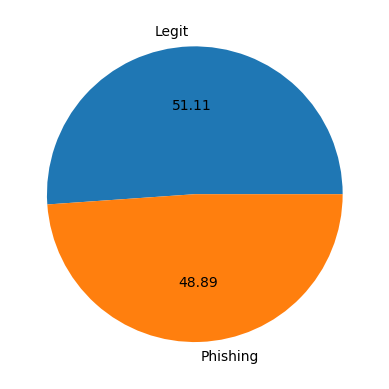

In [299]:
plt.pie(df['label'].value_counts(), labels=['Legit','Phishing'], autopct='%0.2f')
plt.show()

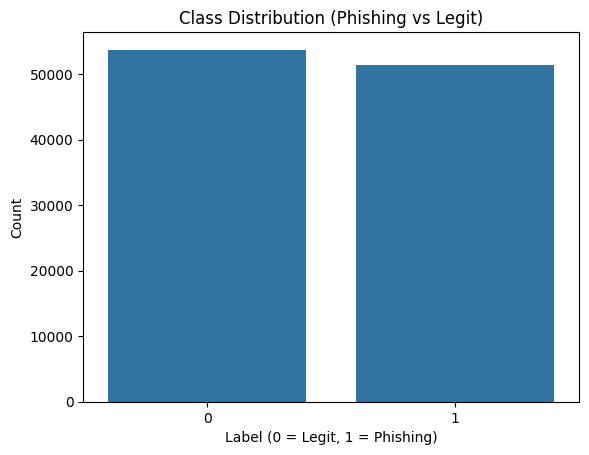

In [300]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Phishing vs Legit)')
plt.xlabel('Label (0 = Legit, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

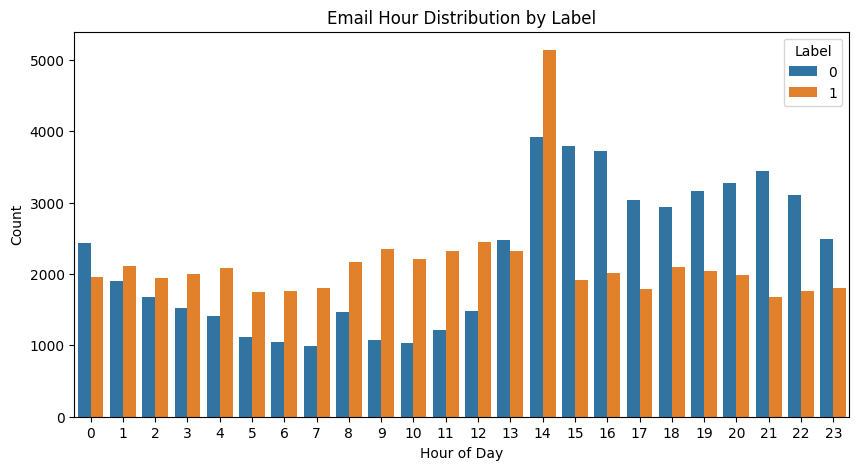

In [301]:
# hour vs label
plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='label', data=df)
plt.title('Email Hour Distribution by Label')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

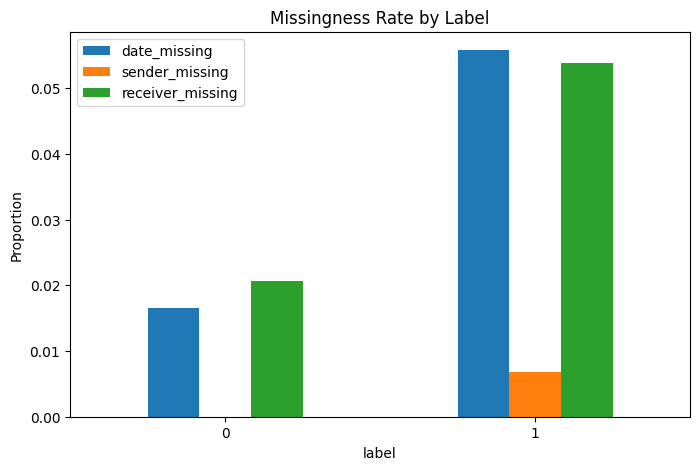

In [302]:
missing_cols = ['date_missing', 'sender_missing', 'receiver_missing']

missing_means = df.groupby('label')[missing_cols].mean().reset_index()

missing_means.plot(
    x='label',
    kind='bar',
    figsize=(8,5)
)
plt.title('Missingness Rate by Label')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

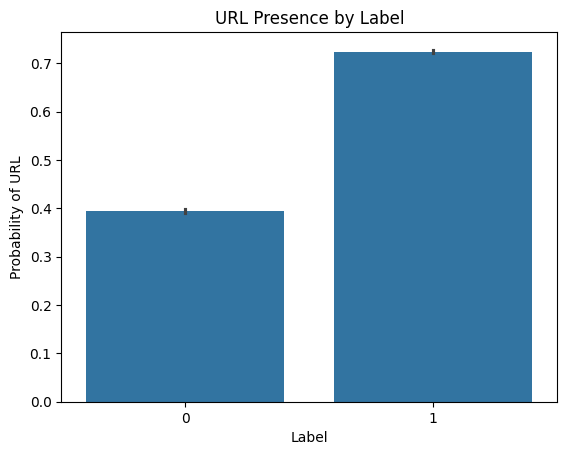

In [303]:
#url presence
sns.barplot(x='label', y='urls', data=df)
plt.title('URL Presence by Label')
plt.ylabel('Probability of URL')
plt.xlabel('Label')
plt.show()

# Preprocessing

In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import WordNetLemmatizer

In [305]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [308]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()    

In [309]:
def parse_sender(sender):
    
    if pd.isna(sender) or not sender:
        return pd.Series({
            "sender_name": "unknown",
            "sender_email": "unknown"
        })
    
    sender = sender.lower()

    email_match = re.search(r'[\w\.-]+@[\w\.-]+', sender)

    if email_match:
        email = email_match.group(0)
    else:
        email = None

    if email and "@" in email:
        domain = email.split('@')[-1].replace('.', ' ')
    else:
        domain = "unknown"

    sender_name = re.sub(r'[\w\.-]+@[\w\.-]+',' ' ,sender)
    sender_name = re.sub(r'[<>"]', ' ', sender_name)
    sender_name = re.sub(r'[^a-z\s]','', sender_name)
    sender_name = re.sub(r'\s+', ' ', sender_name).strip()

    if not sender_name:
        sender_name = "unkown"
    
    return pd.Series({
        "sender_name": sender_name,
        "sender_email": domain,
    })

In [ ]:
# df[['sender_name', 'sender_domain']] = (
#     df['sender'].apply(parse_sender)
# )

In [314]:
def clean_text(text):

    if pd.isna(text) or not text:
        return ""

    text = text.lower()

    text = re.sub(r'https\S+|www\S+|http\S+', ' ', text)

    text = re.sub(r'\n', ' ' , text)

    text = re.sub(r'\S+@\S+', ' ', text)

    text = re.sub(r'[^a-z\s]', ' ', text)

    token = nltk.word_tokenize(text)

    clear_token = []

    for word in token:
        if word in stop_words:
            continue

        if len(word) <=2:
            continue

        lemma = lemmatizer.lemmatize(word, pos='v')

        clear_token.append(lemma)


    return " ".join(clear_token)

In [ ]:
# df['subject'] = df['subject'].apply(clean_text)
# df['body'] = df['body'].apply(clean_text)

In [ ]:
def build_transformed_text(df):
    return (
        'sender '  + df['sender_name'].fillna('')   + ' ' +
        'domain '  + df['sender_domain'].fillna('') + ' ' +
        'subject ' + df['subject'].fillna('')       + ' ' +
        'body '    + df['body'].fillna('')
    ).str.replace(r'\s+', ' ', regex=True).str.strip()

# Custom Transformer

In [1]:
from sklearn.base import BaseEstimator, TransformerMixin

# Modeling

### train test split

In [317]:
X = df.drop('label', axis=1)
y = df['label']

In [318]:
X.head()

,sender,subject,body,urls,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing,sender_name,sender_domain
0,Young Esposito <Young@iworld.de>,never agree loser,buck trouble cause small dimension soon become...,1,2008,8,5,23,1,0,0,0,young esposito,iworld de
1,Mok <ipline's1983@icable.ph>,befriend jenna jameson,upgrade sex pleasures techniques,1,2008,8,5,23,1,0,0,0,mok ipline,icable ph
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,cnn com daily top,daily top cnn com top videos stories aug edt t...,1,2008,8,6,8,2,0,0,0,daily top,universalnet psi br
3,Michael Parker <ivqrnai@pobox.com>,svn commit spamassassin trunk lib mail spamass...,would anyone object remove list tld basically ...,1,2008,8,5,23,1,0,0,0,michael parker,pobox com
4,Gretchen Suggs <externalsep1@loanofficertool.com>,specialpricespharmmoreinfo,welcomefastshippingcustomersupport,1,2008,8,5,23,1,0,0,0,gretchen suggs,loanofficertool com
